<a href="https://colab.research.google.com/github/andresdp/things-blockchain/blob/main/nakamoto_calculations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: "Bitcoin: A peer-to-peer electronic cash system" Satoshi Nakamoto - [link](https://bitcoin.org/bitcoin.pdf)

In [1]:
# Game (race) between the honest chain and an attacker chain, which can be 
# characterizes as a binomial random walk
# Casted as a Gambler's Ruin problem:
# p: probability an honest node finds the next block
# q: (1-p) probability the attacker finds the next block
# z: nombre of blocks being linked after a given block
import math

# Attacker's probability of success
def compute_attacker_success_probability(q, z): 
  p = 1 - q
  lambda_ = z * (q/p) # attacker's potential progress, according to a Poisson distribution
  sum = 1.0
  for k in range(0,z+1):
    poisson = math.exp(-lambda_)
    for i in range (1,k+1):
      poisson *= lambda_/i
    sum -= poisson * (1 - math.pow(q/p, z-k))

  return sum

In [2]:
# A simple calculation
q = 0.1
for z in range(0,11):
  prob_success = compute_attacker_success_probability(q,z)
  print("q= {:.2f}".format(q),"z=", z, "\tP= {:.8f}".format(prob_success))

q= 0.10 z= 0 	P= 1.00000000
q= 0.10 z= 1 	P= 0.20458727
q= 0.10 z= 2 	P= 0.05097789
q= 0.10 z= 3 	P= 0.01317224
q= 0.10 z= 4 	P= 0.00345524
q= 0.10 z= 5 	P= 0.00091368
q= 0.10 z= 6 	P= 0.00024280
q= 0.10 z= 7 	P= 0.00006474
q= 0.10 z= 8 	P= 0.00001730
q= 0.10 z= 9 	P= 0.00000463
q= 0.10 z= 10 	P= 0.00000124


In [3]:
#from __future__ import print_function
from ipywidgets import interact, interactive
import ipywidgets as widgets

import matplotlib.pyplot as plt
import numpy as np

In [4]:
# A more interactive calculation
def f(q,z):
  prob_success = compute_attacker_success_probability(q,z)
  print("P= {:.8f}".format(prob_success))

widgets.interact(f, 
         q=widgets.FloatSlider(min=0.1, max=0.5, step=0.05, value=0.2), 
         z=widgets.IntSlider(min=0, max=20, step=1, value=1));

interactive(children=(FloatSlider(value=0.2, description='q', max=0.5, min=0.1, step=0.05), IntSlider(value=1,…

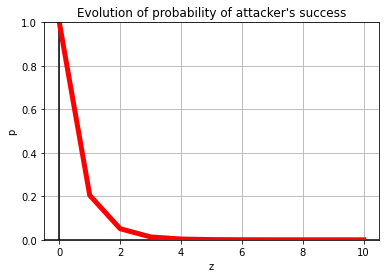

In [5]:
# A visualization of the evolution of p (when q and z are fixed)
def attacker_success_probability_plot(q, z_max):
  plt.figure(2)
  z = np.linspace(0, z_max, num=z_max+1)
  #print(z)
  prob_success = []
  for i in z:
    #print(int(i),q)
    prob_success.append(compute_attacker_success_probability(q,int(i)))

  plt.ylim(0,1)
  plt.axvline(color='black')
  plt.axhline(color='black')
  plt.plot(z, prob_success, lw=5,color='red')
  plt.ylabel("p")
  plt.xlabel("z")
  plt.title("Evolution of probability of attacker's success")
  plt.grid()
  plt.show()

attacker_success_probability_plot(0.1,10)

In [6]:
# Now the interactive visualization
widgets.interact(attacker_success_probability_plot, 
         q=widgets.FloatSlider(min=0.1, max=0.5, step=0.05, value=0.2), 
         z_max=widgets.IntSlider(min=0, max=20, step=1, value=10));

interactive(children=(FloatSlider(value=0.2, description='q', max=0.5, min=0.1, step=0.05), IntSlider(value=10…

In [7]:
import numpy as np

# Finding the minimum z (number of blocks) for a merchant to counteract the attacker's probability of success
def compute_minimum_z_for_merchant(prob, q_num=20, q_max=1.0, z_max=200, tolerance=0.0001):

  q_values = []
  z_values = []

  q_range = np.linspace(0, q_max, num=q_num+1)
  for q in q_range:
    min_z = z_max+1
    for z in range(0,z_max+1):
      p = compute_attacker_success_probability(q,z)
      if (p > 0) and (p <= 1.0) and (abs(p - prob) < tolerance):
        if z < min_z:
          min_z = z
          break
    
    p = compute_attacker_success_probability(q,min_z)
    if (p > 0) and (min_z <= z_max):
      q_values.append(q)
      z_values.append(min_z)
      #print(prob,p, q, min_z)
      #print("=====")

  return q_values, z_values

compute_minimum_z_for_merchant(0.02, tolerance=0.001)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


([0.25, 0.35000000000000003, 0.4, 0.45], [8, 22, 48, 181])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


#points: 7


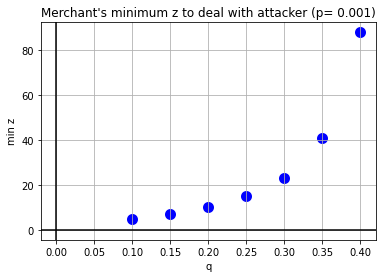

In [8]:
import matplotlib.pyplot as plt

# A visualization of the evolution of the minimum z 
def minimum_z_value_for_merchant_plot(p, q_max=1.0):

  q_values, z_min_values = compute_minimum_z_for_merchant(p, q_num=20, q_max=q_max, tolerance=p/10)
  #print(q_values, z_min_values)
  print("#points:", len(q_values))

  plt.figure(2)

  plt.axvline(color='black')
  plt.axhline(color='black')
  plt.scatter(q_values, z_min_values, lw=5,color='blue')
  plt.xlabel("q")
  plt.ylabel("min z")
  plt.title("Merchant's minimum z to deal with attacker (p= "+str(p)+")")
  plt.grid()
  plt.show()

minimum_z_value_for_merchant_plot(0.001, q_max=1.0)

In [9]:
# Now the interactive visualization
widgets.interact(minimum_z_value_for_merchant_plot, 
         p=widgets.FloatSlider(min=0.0, max=0.2, step=0.001, value=0.001), 
         q_max=widgets.FloatSlider(min=0, max=1.0, step=0.1, value=0.4));

interactive(children=(FloatSlider(value=0.001, description='p', max=0.2, step=0.001), FloatSlider(value=0.4, d…

In [10]:
from ipywidgets import Widget
Widget.close_all()

---